#Libraries

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [120]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Functions

In [121]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

#Dataset

In [122]:
trial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Agrimonia/Recap previous thesis/Agrimonia_Dataset_v_2_0_1.csv')
trial.head()

<ipython-input-122-378a04c23d50>:1: DtypeWarning: Columns (0,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  trial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Agrimonia/Recap previous thesis/Agrimonia_Dataset_v_2_0_1.csv')


,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
0,1264,46.167852,9.87921,2016-01-01,290,6.200e+01,5.300e+01,NaN,NaN,8.263e+01,...,6.166e-01,8.359e-01,1.720e+00,3.906e-01,0.3832,5.892,3.998,1.234,112,17.0
1,1264,46.167852,9.87921,2016-01-02,290,7.300e+01,6.300e+01,NaN,NaN,1.017e+02,...,6.298e-01,8.372e-01,1.720e+00,3.911e-01,0.3832,5.892,3.997,1.234,112,17.0
2,1264,46.167852,9.87921,2016-01-03,290,4.400e+01,3.900e+01,NaN,NaN,6.626e+01,...,6.424e-01,8.384e-01,1.720e+00,3.916e-01,0.3832,5.892,3.997,1.234,112,17.0
3,1264,46.167852,9.87921,2016-01-04,290,3.100e+01,2.900e+01,NaN,NaN,6.331e+01,...,6.545e-01,8.396e-01,1.720e+00,3.923e-01,0.3832,5.892,3.997,1.234,112,17.0
4,1264,46.167852,9.87921,2016-01-05,290,2.700e+01,2.600e+01,NaN,NaN,7.553e+01,...,6.660e-01,8.409e-01,1.720e+00,3.931e-01,0.3832,5.892,3.997,1.233,112,17.0


In [123]:
trial = trial[trial["IDStations"]==1266]
trial.head()

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
4384,1266,45.233494,9.66625,2016-01-01,65,5.200e+01,NaN,NaN,3.220e+01,3.621e+01,...,9.749e+00,1.922e+00,3.844e+00,9.099e-01,513.5,255.2,1.548,2.084,112,17.0
4385,1266,45.233494,9.66625,2016-01-02,65,3.900e+01,NaN,NaN,1.460e+01,2.972e+01,...,9.792e+00,1.925e+00,3.832e+00,9.082e-01,514.0,255.1,1.548,2.084,112,17.0
4386,1266,45.233494,9.66625,2016-01-03,65,2.600e+01,NaN,NaN,1.120e+01,2.827e+01,...,9.832e+00,1.928e+00,3.821e+00,9.067e-01,514.5,255.1,1.548,2.084,112,17.0
4387,1266,45.233494,9.66625,2016-01-04,65,2.900e+01,NaN,NaN,1.080e+01,2.462e+01,...,9.869e+00,1.931e+00,3.809e+00,9.054e-01,515.0,255.0,1.548,2.083,112,17.0
4388,1266,45.233494,9.66625,2016-01-05,65,3.400e+01,NaN,NaN,1.510e+01,3.484e+01,...,9.903e+00,1.933e+00,3.797e+00,9.042e-01,515.5,254.9,1.548,2.083,112,17.0


In [124]:
#df['IDStations'] = df['IDStations'].astype(float)
trial['AQ_pm10'] = trial['AQ_pm10'].astype(float)
trial['AQ_nh3'] = trial['AQ_nh3'].astype(float)
trial['AQ_nox'] = trial['AQ_nox'].astype(float)
trial['AQ_no2'] = trial['AQ_no2'].astype(float)

trial['EM_nh3_livestock_mm'] = trial['EM_nh3_livestock_mm'].astype(float)
trial['EM_nh3_agr_soils'] = trial['EM_nh3_agr_soils'].astype(float)
trial['EM_nh3_agr_waste_burn'] = trial['EM_nh3_agr_waste_burn'].astype(float)
trial['EM_nh3_sum'] = trial['EM_nh3_sum'].astype(float)
trial['EM_nox_traffic'] = trial['EM_nox_traffic'].astype(float)
trial['EM_nox_sum'] = trial['EM_nox_sum'].astype(float)
trial['EM_so2_sum'] = trial['EM_so2_sum'].astype(float)
trial['LI_pigs'] = trial['LI_pigs'].astype(float)
trial['LI_bovine'] = trial['LI_bovine'].astype(float)

In [125]:
trial.dropna(inplace=True)
trial.head()

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
4384,1266,45.233494,9.66625,2016-01-01,65,52.0,NaN,NaN,32.2,36.21,...,9.749,1.922,3.844,0.9099,513.5,255.2,1.548,2.084,112,17.0
4385,1266,45.233494,9.66625,2016-01-02,65,39.0,NaN,NaN,14.6,29.72,...,9.792,1.925,3.832,0.9082,514.0,255.1,1.548,2.084,112,17.0
4386,1266,45.233494,9.66625,2016-01-03,65,26.0,NaN,NaN,11.2,28.27,...,9.832,1.928,3.821,0.9067,514.5,255.1,1.548,2.084,112,17.0
4387,1266,45.233494,9.66625,2016-01-04,65,29.0,NaN,NaN,10.8,24.62,...,9.869,1.931,3.809,0.9054,515.0,255.0,1.548,2.083,112,17.0
4388,1266,45.233494,9.66625,2016-01-05,65,34.0,NaN,NaN,15.1,34.84,...,9.903,1.933,3.797,0.9042,515.5,254.9,1.548,2.083,112,17.0


In [126]:
columns_to_convert = ['AQ_pm10','Latitude', 'Longitude', 'Altitude', 'WE_temp_2m', 'WE_wind_speed_10m_mean', 'WE_wind_speed_10m_max', 'WE_tot_precipitation', 'WE_precipitation_t', 'WE_surface_pressure', 'WE_solar_radiation', 'WE_rh_min', 'WE_rh_mean', 'WE_rh_max', 'WE_wind_speed_100m_max', 'WE_blh_layer_max', 'WE_blh_layer_min', 'EM_nh3_livestock_mm', 'EM_nh3_agr_soils', 'EM_nh3_agr_waste_burn', 'EM_nh3_sum', 'EM_nox_traffic', 'EM_nox_sum', 'EM_so2_sum', 'LI_pigs', 'LI_bovine', 'LA_hvi', 'LA_lvi', 'LA_land_use', 'LA_soil_use']
bumpy_array = trial[columns_to_convert].values
dataset= bumpy_array

print(type(bumpy_array))
print(dataset)

<class 'numpy.ndarray'>
[[ 5.200e+01  4.523e+01  9.666e+00  6.500e+01  2.161e+00  9.449e-01
   1.818e+00  8.652e-06  0.000e+00  1.019e+05  5.330e+06  9.217e+01
   9.716e+01  9.967e+01  2.622e+00  3.517e+02  1.388e+01  8.907e+00
   3.187e-01  1.439e-01  9.749e+00  1.922e+00  3.844e+00  9.099e-01
   5.135e+02  2.552e+02  1.548e+00  2.084e+00  1.120e+02  1.700e+01]
 [ 3.900e+01  4.523e+01  9.666e+00  6.500e+01  9.301e-01  1.466e+00
   2.335e+00  1.020e-01  1.000e+00  1.011e+05  7.825e+05  9.769e+01
   9.912e+01  9.988e+01  4.317e+00  2.633e+02  4.282e+01  8.927e+00
   3.462e-01  1.395e-01  9.792e+00  1.925e+00  3.832e+00  9.082e-01
   5.140e+02  2.551e+02  1.548e+00  2.084e+00  1.120e+02  1.700e+01]
 [ 2.600e+01  4.523e+01  9.666e+00  6.500e+01  2.269e+00  2.065e+00
   3.364e+00  5.358e-02  1.000e+00  1.002e+05  3.285e+06  9.603e+01
   9.846e+01  9.989e+01  6.581e+00  3.555e+02  9.828e+01  8.944e+00
   3.722e-01  1.348e-01  9.832e+00  1.928e+00  3.821e+00  9.067e-01
   5.145e+02  2.551e+0

In [127]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [128]:
# Set the desired precision for printing
np.set_printoptions(precision=3)
np.set_printoptions(threshold=np.inf)

# Print the rounded dataset
print(dataset)

[[3.611e-01 0.000e+00 0.000e+00 0.000e+00 1.293e-01 8.544e-02 1.030e-01
  8.170e-06 0.000e+00 7.500e-01 2.029e-01 7.756e-01 8.817e-01 9.772e-01
  7.466e-02 6.968e-02 5.606e-03 2.718e-03 5.011e-03 3.146e-01 4.290e-03
  5.003e-01 6.568e-01 8.940e-01 5.316e-01 1.000e+00 1.179e-03 3.807e-03
  0.000e+00 1.000e+00]
 [2.708e-01 0.000e+00 0.000e+00 0.000e+00 9.238e-02 1.704e-01 1.669e-01
  9.632e-02 1.667e-01 5.682e-01 8.595e-03 9.541e-01 9.804e-01 9.917e-01
  1.936e-01 4.133e-02 5.778e-02 3.542e-03 5.880e-03 3.047e-01 5.208e-03
  5.021e-01 6.521e-01 8.911e-01 5.351e-01 9.890e-01 1.179e-03 3.807e-03
  0.000e+00 1.000e+00]
 [1.806e-01 0.000e+00 0.000e+00 0.000e+00 1.325e-01 2.680e-01 2.940e-01
  5.059e-02 1.667e-01 3.636e-01 1.155e-01 9.004e-01 9.472e-01 9.924e-01
  3.524e-01 7.090e-02 1.578e-01 4.242e-03 6.701e-03 2.940e-01 6.062e-03
  5.038e-01 6.478e-01 8.886e-01 5.387e-01 9.890e-01 1.179e-03 3.807e-03
  0.000e+00 1.000e+00]
 [2.014e-01 0.000e+00 0.000e+00 0.000e+00 1.214e-01 1.433e-01 2.930

#Train and test

In [129]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

800 395


In [130]:
# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

In [131]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [132]:
print(len(trainX))
print(len(trainY))

798
798


In [133]:
print(trainX.shape[1])
print(trainY.shape)


1
(798,)


In [134]:
print(trainX)

[[[3.611e-01 0.000e+00 0.000e+00 0.000e+00 1.293e-01 8.544e-02 1.030e-01
   8.170e-06 0.000e+00 7.500e-01 2.029e-01 7.756e-01 8.817e-01 9.772e-01
   7.466e-02 6.968e-02 5.606e-03 2.718e-03 5.011e-03 3.146e-01 4.290e-03
   5.003e-01 6.568e-01 8.940e-01 5.316e-01 1.000e+00 1.179e-03 3.807e-03
   0.000e+00 1.000e+00]]

 [[2.708e-01 0.000e+00 0.000e+00 0.000e+00 9.238e-02 1.704e-01 1.669e-01
   9.632e-02 1.667e-01 5.682e-01 8.595e-03 9.541e-01 9.804e-01 9.917e-01
   1.936e-01 4.133e-02 5.778e-02 3.542e-03 5.880e-03 3.047e-01 5.208e-03
   5.021e-01 6.521e-01 8.911e-01 5.351e-01 9.890e-01 1.179e-03 3.807e-03
   0.000e+00 1.000e+00]]

 [[1.806e-01 0.000e+00 0.000e+00 0.000e+00 1.325e-01 2.680e-01 2.940e-01
   5.059e-02 1.667e-01 3.636e-01 1.155e-01 9.004e-01 9.472e-01 9.924e-01
   3.524e-01 7.090e-02 1.578e-01 4.242e-03 6.701e-03 2.940e-01 6.062e-03
   5.038e-01 6.478e-01 8.886e-01 5.387e-01 9.890e-01 1.179e-03 3.807e-03
   0.000e+00 1.000e+00]]

 [[2.014e-01 0.000e+00 0.000e+00 0.000e+00 1.2

In [135]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [136]:
print(len(trainX))
print(len(trainY))
print(len(testX))

798
798
393


In [137]:
print(testX.shape)

(393, 1, 30)


In [138]:
trainX = np.reshape(trainX, (798, 30))
testX = np.reshape(testX, (393, 30))

In [139]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(798, 30)
(798,)
(393, 30)


In [140]:
look_back = 1

# create and fit the LSTM network
model = LinearRegression()
model.fit(trainX, trainY)

LinearRegression()

In [141]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [142]:
print(trainPredict.shape)
print(testPredict.shape)

(798,)
(393,)


In [143]:
print(trainY.shape)
print(testY.shape)

(798,)
(393,)


In [144]:
trainY = trainY.reshape(798, 1)
testY  = testY.reshape(393,1)

In [145]:
print(trainY.shape)
print(testY.shape)

(798, 1)
(393, 1)


In [146]:
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.08 RMSE


In [147]:
trainMAE = mean_absolute_error(trainY, trainPredict)
testMAE = mean_absolute_error(testY, testPredict)

# Calculate R2 score
trainR2 = r2_score(trainY, trainPredict)
testR2 = r2_score(testY, testPredict)

# Calculate RMSE
trainRMSE = np.sqrt(mean_squared_error(trainY, trainPredict))
testRMSE = np.sqrt(mean_squared_error(testY, testPredict))

# Calculate variance
trainVariance = np.var(trainPredict)
testVariance = np.var(testPredict)

# Print the results
print('Train MAE: %.2f' % trainMAE)
print('Train R2 Score: %.2f' % trainR2)
print('Train RMSE: %.2f' % trainRMSE)
print('Train Variance: %.2f' % trainVariance)

print('Test MAE: %.2f' % testMAE)
print('Test R2 Score: %.2f' % testR2)
print('Test RMSE: %.2f' % testRMSE)
print('Test Variance: %.2f' % testVariance)

Train MAE: 0.06
Train R2 Score: 0.70
Train RMSE: 0.08
Train Variance: 0.01
Test MAE: 0.06
Test R2 Score: 0.54
Test RMSE: 0.08
Test Variance: 0.01


#Plotting

In [148]:
print(trainY.shape)
print(testY.shape)
print(trainPredict.shape)
print(testPredict.shape)

(798, 1)
(393, 1)
(798,)
(393,)


In [149]:
trainY = trainY.reshape(-1)
testY = testY.reshape(-1)
trainPredict = trainPredict.reshape(-1)
testPredict = testPredict.reshape(-1)

In [150]:
print(trainY.shape)
print(testY.shape)
print(trainPredict.shape)
print(testPredict.shape)

(798,)
(393,)
(798,)
(393,)


In [151]:
results = pd.DataFrame({'Actual': trainY, 'Predicted': trainPredict})


## Train

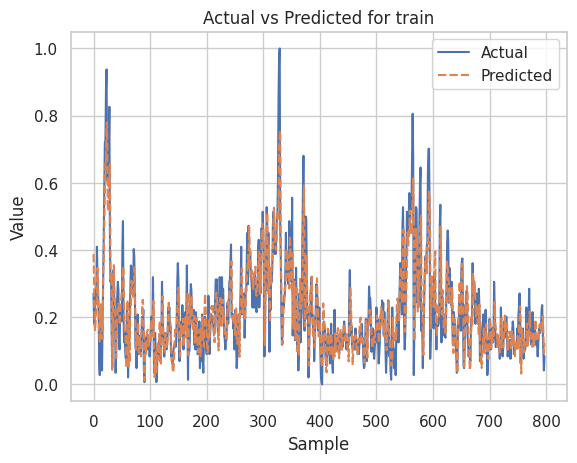

In [152]:
sns.set(style='whitegrid')
sns.lineplot(data=results)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted for train')
plt.show()

##Test

In [153]:
results = pd.DataFrame({'Actual': testY, 'Predicted': testPredict})

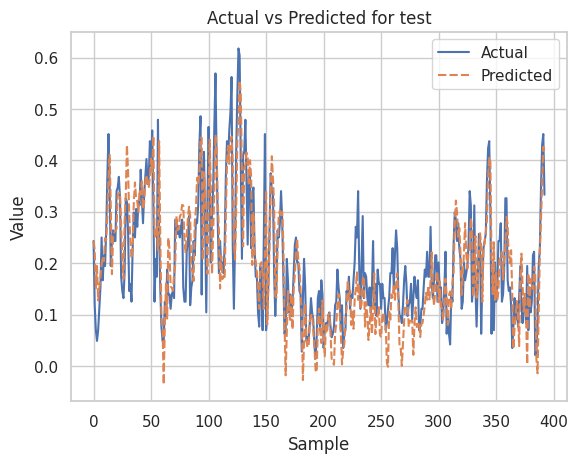

In [154]:
sns.set(style='whitegrid')
sns.lineplot(data=results)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted for test')
plt.show()

##Scatterplot

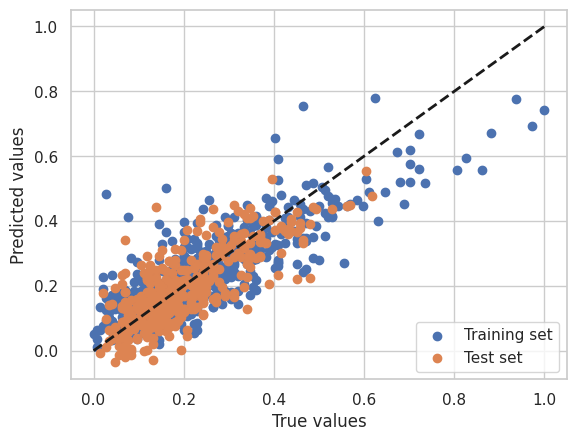

In [155]:
import matplotlib.pyplot as plt

# Calculate the predictions of the model on the training and test data
y_train_pred = model.predict(trainX)
y_test_pred = model.predict(testX)

# Plot the graph
plt.scatter(trainY, y_train_pred, label='Training set')
plt.scatter(testY, y_test_pred, label='Test set')
plt.plot([trainY.min(), trainY.max()], [trainY.min(), trainY.max()], 'k--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(loc='lower right')
plt.show()
